In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
# define filepath to read data


index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names


train_1 = pd.read_csv('C:\\Users\\User\\CMAPSSData\\train.csv',sep='\s+',header=None, names=col_names)

test_1 = pd.read_csv('C:\\Users\\User\\CMAPSSData\\test_FD001.csv',sep='\s+',header=None, names=col_names)

y_test = pd.read_csv('C:\\Users\\User\\CMAPSSData\\RUL_FD001.csv',sep='\s+',header=None, names=['RUL'])
#RUL_1 = pd.read_csv('C:\\Users\\User\\CMAPSSData\\RUL_FD001.csv',header=None, names=['RUL'])
#read_file = pd.read_csv (r'C:\Users\User\CMAPSSData\test_FD001.txt')
#test = read_file.to_csv (r'C:\Users\User\CMAPSSData\test_FD001.csv', index=None)


# define column names for easy indexing


# read data
#train = pd.read_csv((dir_path+'train_FD001.txt'), sep='\s+', header=None, names=col_names)
#test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', header=None, names=col_names)
#y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

#test_1.head()
train_1.head()
#y_test.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393   

   s_18   s_19   s_20     s_21  
0  2388  100.0  39.06  23.4190  
1  2388  100.0  39.00  23.4236  
2  2388  100.0  38.95  23.3442  
3  2388  100.0  38.88  23.3739  
4  2388  100.0  38.90  23.4044  

[5 rows x 26 columns]

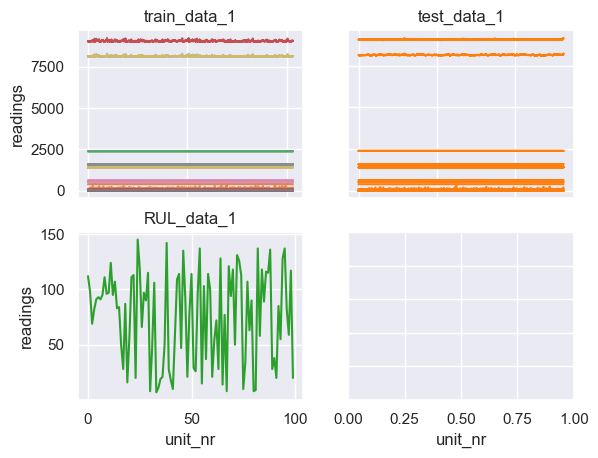

In [ ]:
fig, axs = plt.subplots(2,2)
axs[0, 0].plot(train_1)
axs[0, 0].set_title('train_data_1')
axs[0, 1].plot(test_1, 'tab:orange')
axs[0, 1].set_title('test_data_1')
axs[1, 0].plot(y_test, 'tab:green')
axs[1, 0].set_title('RUL_data_1')

for ax in axs.flat:
    ax.set(xlabel='unit_nr', ylabel='readings')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
#plt.plot(train_1)
#plt.show()

#scaled_train = MinMaxScaler().fit(test_1,y_test)
#plt.plot(scaled_train)
#plt.show()

#from sklearn.preprocessing import StandardScaler
#standrdz_train = StandardScaler().fit(test_1,y_test)
#plt.plot(standrdz_train)
#plt.show()



In [ ]:
train_1[setting_names].describe()

setting_1     setting_2  setting_3
count  20631.000000  20631.000000    20631.0
mean      -0.000009      0.000002      100.0
std        0.002187      0.000293        0.0
min       -0.008700     -0.000600      100.0
25%       -0.001500     -0.000200      100.0
50%        0.000000      0.000000      100.0
75%        0.001500      0.000300      100.0
max        0.008700      0.000600      100.0

In [ ]:
# setting 3 has no std so we can discard it. Setting 1 and 2 have small fluctuations

In [ ]:
train_1[index_names].describe()

unit_nr   time_cycles
count  20631.000000  20631.000000
mean      51.506568    108.807862
std       29.227633     68.880990
min        1.000000      1.000000
25%       26.000000     52.000000
50%       52.000000    104.000000
75%       77.000000    156.000000
max      100.000000    362.000000

In [ ]:
#Here,to calculate RUL we will need max_time_cycle which is 362.
# RUL = max_time_cycle - time_cycle

In [ ]:
train_1[sensor_names].describe().T

count         mean           std        min        25%        50%  \
s_1   20631.0   518.670000  6.537152e-11   518.6700   518.6700   518.6700   
s_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s_5   20631.0    14.620000  3.394700e-12    14.6200    14.6200    14.6200   
s_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s_10  20631.0     1.300000  4.660829e-13     1.3000     1.3000     1.3000   
s_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s_14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s_15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s_16  20631.0     0.030000  1.556432e-14     0.0300     0.0300     0.0300   
s_17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s_18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s_19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s_20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s_21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

            75%        max  
s_1    518.6700   518.6700  
s_2    643.0000   644.5300  
s_3   1594.3800  1616.9100  
s_4   1414.5550  1441.4900  
s_5     14.6200    14.6200  
s_6     21.6100    21.6100  
s_7    554.0100   556.0600  
s_8   2388.1400  2388.5600  
s_9   9069.4200  9244.5900  
s_10     1.3000     1.3000  
s_11    47.7000    48.5300  
s_12   521.9500   523.3800  
s_13  2388.1400  2388.5600  
s_14  8148.3100  8293.7200  
s_15     8.4656     8.5848  
s_16     0.0300     0.0300  
s_17   394.0000   400.0000  
s_18  2388.0000  2388.0000  
s_19   100.0000   100.0000  
s_20    38.9500    39.4300  
s_21    23.3668    23.6184

In [ ]:
#observe that;
#sensors 18 and 19 have 0 std so we can discard them,
# sensors 1,56,10,15 have unchanged quartiles and
#extremely small fluctuations that we can discard them
#with some inspections as well.
#Also, sensors 9 and 14 have the highest fluctuations, there might be outliers

In [ ]:
# COMPUTING RUL#

In [ ]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    return max_cycle
add_remaining_useful_life(train_1)

unit_nr
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: time_cycles, Length: 100, dtype: int64

In [ ]:
print("max cycle:",add_remaining_useful_life(train_1).max())

max cycle: 362


In [ ]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    return result_frame
add_remaining_useful_life(train_1)

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...          ...        ...        ...        ...     ...     ...   
20626      100          196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100          197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100          198     0.0004     0.0000      100.0  518.67  643.42   
20629      100          199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100          200    -0.0032    -0.0005      100.0  518.67  643.85   

           s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  \
0      1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   392   
1      1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   392   
2      1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   390   
3      1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   392   
4      1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   393   
...        ...      ...    ...  ...      ...      ...     ...   ...   ...   
20626  1597.98  1428.63  14.62  ...  2388.26  8137.60  8.4956  0.03   397   
20627  1604.50  1433.58  14.62  ...  2388.22  8136.50  8.5139  0.03   395   
20628  1602.46  1428.18  14.62  ...  2388.24  8141.05  8.5646  0.03   398   
20629  1605.26  1426.53  14.62  ...  2388.23  8139.29  8.5389  0.03   395   
20630  1600.38  1432.14  14.62  ...  2388.26  8137.33  8.5036  0.03   396   

       s_18   s_19   s_20     s_21  max_cycle  
0      2388  100.0  39.06  23.4190        192  
1      2388  100.0  39.00  23.4236        192  
2      2388  100.0  38.95  23.3442        192  
3      2388  100.0  38.88  23.3739        192  
4      2388  100.0  38.90  23.4044        192  
...     ...    ...    ...      ...        ...  
20626  2388  100.0  38.49  22.9735        200  
20627  2388  100.0  38.30  23.1594        200  
20628  2388  100.0  38.44  22.9333        200  
20629  2388  100.0  38.29  23.0640        200  
20630  2388  100.0  38.37  23.0522        200  

[20631 rows x 27 columns]

In [ ]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    return result_frame

add_remaining_useful_life(train_1)

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...          ...        ...        ...        ...     ...     ...   
20626      100          196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100          197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100          198     0.0004     0.0000      100.0  518.67  643.42   
20629      100          199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100          200    -0.0032    -0.0005      100.0  518.67  643.85   

           s_3      s_4    s_5  ...     s_14    s_15  s_16  s_17  s_18   s_19  \
0      1589.70  1400.60  14.62  ...  8138.62  8.4195  0.03   392  2388  100.0   
1      1591.82  1403.14  14.62  ...  8131.49  8.4318  0.03   392  2388  100.0   
2      1587.99  1404.20  14.62  ...  8133.23  8.4178  0.03   390  2388  100.0   
3      1582.79  1401.87  14.62  ...  8133.83  8.3682  0.03   392  2388  100.0   
4      1582.85  1406.22  14.62  ...  8133.80  8.4294  0.03   393  2388  100.0   
...        ...      ...    ...  ...      ...     ...   ...   ...   ...    ...   
20626  1597.98  1428.63  14.62  ...  8137.60  8.4956  0.03   397  2388  100.0   
20627  1604.50  1433.58  14.62  ...  8136.50  8.5139  0.03   395  2388  100.0   
20628  1602.46  1428.18  14.62  ...  8141.05  8.5646  0.03   398  2388  100.0   
20629  1605.26  1426.53  14.62  ...  8139.29  8.5389  0.03   395  2388  100.0   
20630  1600.38  1432.14  14.62  ...  8137.33  8.5036  0.03   396  2388  100.0   

        s_20     s_21  max_cycle  RUL  
0      39.06  23.4190        192  191  
1      39.00  23.4236        192  190  
2      38.95  23.3442        192  189  
3      38.88  23.3739        192  188  
4      38.90  23.4044        192  187  
...      ...      ...        ...  ...  
20626  38.49  22.9735        200    4  
20627  38.30  23.1594        200    3  
20628  38.44  22.9333        200    2  
20629  38.29  23.0640        200    1  
20630  38.37  23.0522        200    0  

[20631 rows x 28 columns]

In [ ]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life

    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
add_remaining_useful_life(train_1)

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...          ...        ...        ...        ...     ...     ...   
20626      100          196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100          197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100          198     0.0004     0.0000      100.0  518.67  643.42   
20629      100          199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100          200    -0.0032    -0.0005      100.0  518.67  643.85   

           s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  \
0      1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   392   
1      1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   392   
2      1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   390   
3      1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   392   
4      1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   393   
...        ...      ...    ...  ...      ...      ...     ...   ...   ...   
20626  1597.98  1428.63  14.62  ...  2388.26  8137.60  8.4956  0.03   397   
20627  1604.50  1433.58  14.62  ...  2388.22  8136.50  8.5139  0.03   395   
20628  1602.46  1428.18  14.62  ...  2388.24  8141.05  8.5646  0.03   398   
20629  1605.26  1426.53  14.62  ...  2388.23  8139.29  8.5389  0.03   395   
20630  1600.38  1432.14  14.62  ...  2388.26  8137.33  8.5036  0.03   396   

       s_18   s_19   s_20     s_21  RUL  
0      2388  100.0  39.06  23.4190  191  
1      2388  100.0  39.00  23.4236  190  
2      2388  100.0  38.95  23.3442  189  
3      2388  100.0  38.88  23.3739  188  
4      2388  100.0  38.90  23.4044  187  
...     ...    ...    ...      ...  ...  
20626  2388  100.0  38.49  22.9735    4  
20627  2388  100.0  38.30  23.1594    3  
20628  2388  100.0  38.44  22.9333    2  
20629  2388  100.0  38.29  23.0640    1  
20630  2388  100.0  38.37  23.0522    0  

[20631 rows x 27 columns]

In [ ]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life

    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train_1 = add_remaining_useful_life(train_1)
train_1[index_names+['RUL']] #.head()

unit_nr  time_cycles  RUL
0            1            1  191
1            1            2  190
2            1            3  189
3            1            4  188
4            1            5  187
...        ...          ...  ...
20626      100          196    4
20627      100          197    3
20628      100          198    2
20629      100          199    1
20630      100          200    0

[20631 rows x 3 columns]

In [ ]:
train_1[index_names+['RUL']].describe()

unit_nr   time_cycles           RUL
count  20631.000000  20631.000000  20631.000000
mean      51.506568    108.807862    107.807862
std       29.227633     68.880990     68.880990
min        1.000000      1.000000      0.000000
25%       26.000000     52.000000     51.000000
50%       52.000000    104.000000    103.000000
75%       77.000000    156.000000    155.000000
max      100.000000    362.000000    361.000000

In [ ]:
#DATA VISUALIZATION#

In [ ]:
df_max_rul = train_1[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index() #reset_index():en soldaki (0-99) sütununu ekliyor
df_max_rul

unit_nr  RUL
0         1  191
1         2  286
2         3  178
3         4  188
4         5  268
..      ...  ...
95       96  335
96       97  201
97       98  155
98       99  184
99      100  199

[100 rows x 2 columns]

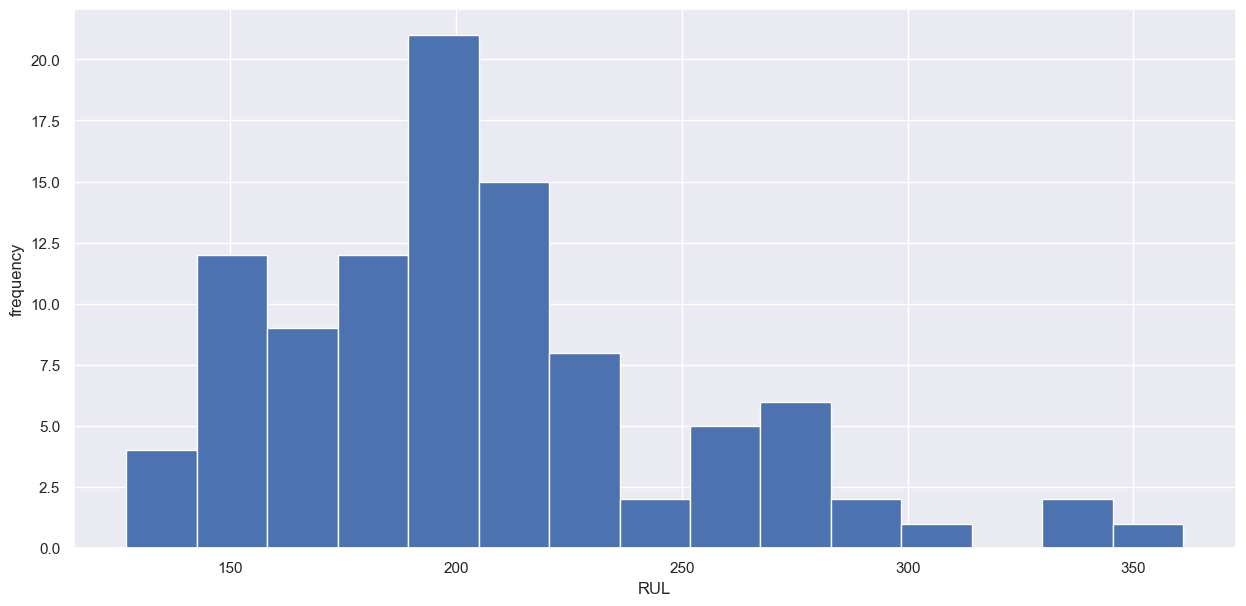

In [ ]:
# distribution of RUL, similar to the 'describe function' of time_cycles above, but visual
df_max_rul = train_1[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7)) #figsize=(15,7):The size in inches of the figure to create i.e (15,7) inches
plt.xlabel('RUL')                               # bins=15 : 15 bars
plt.ylabel('frequency')
plt.show()

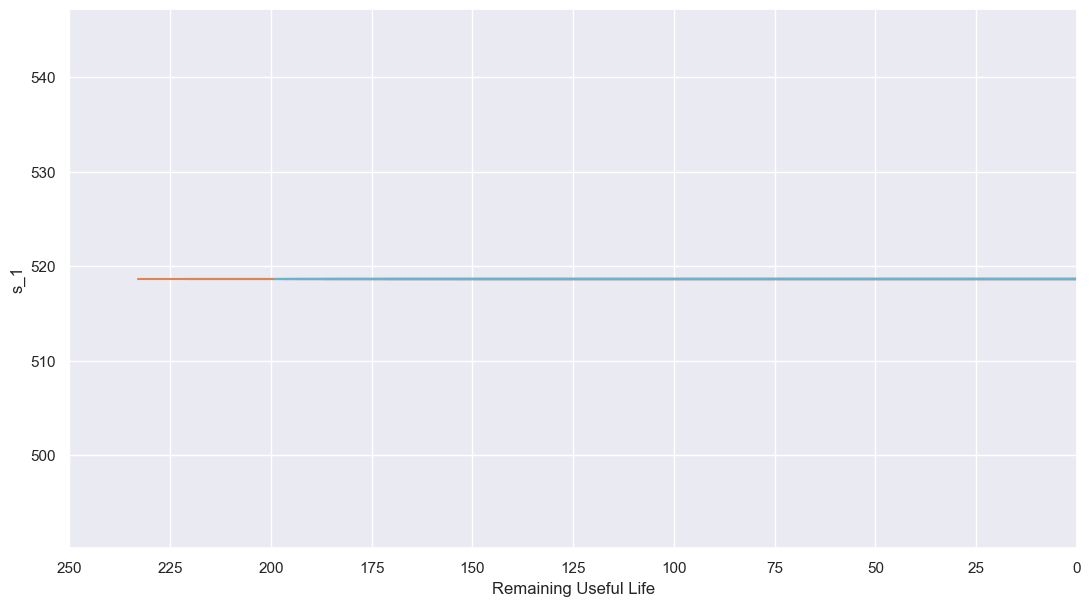

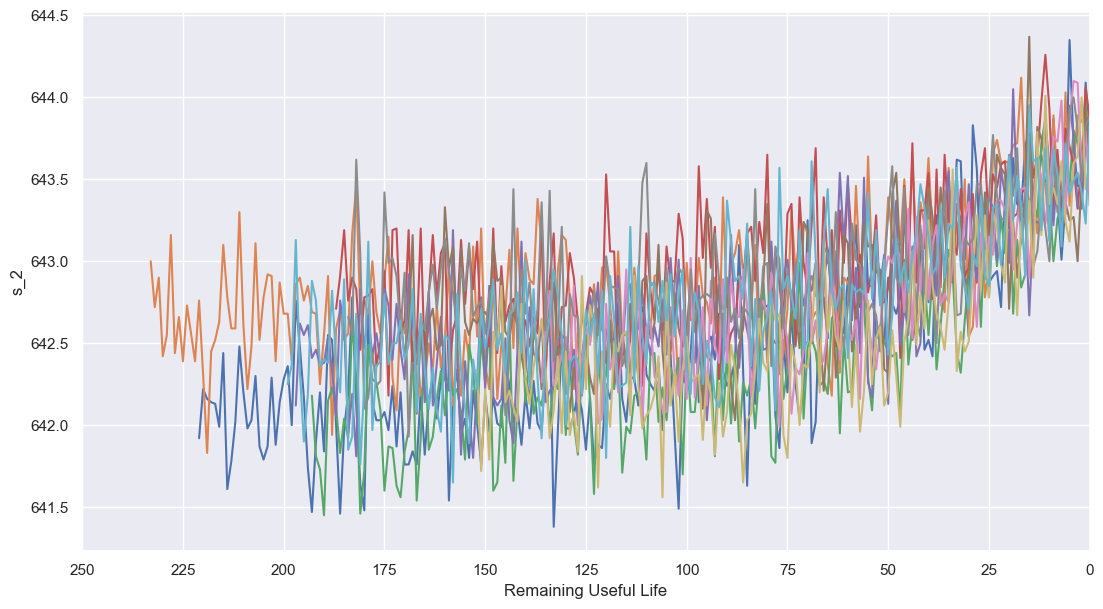

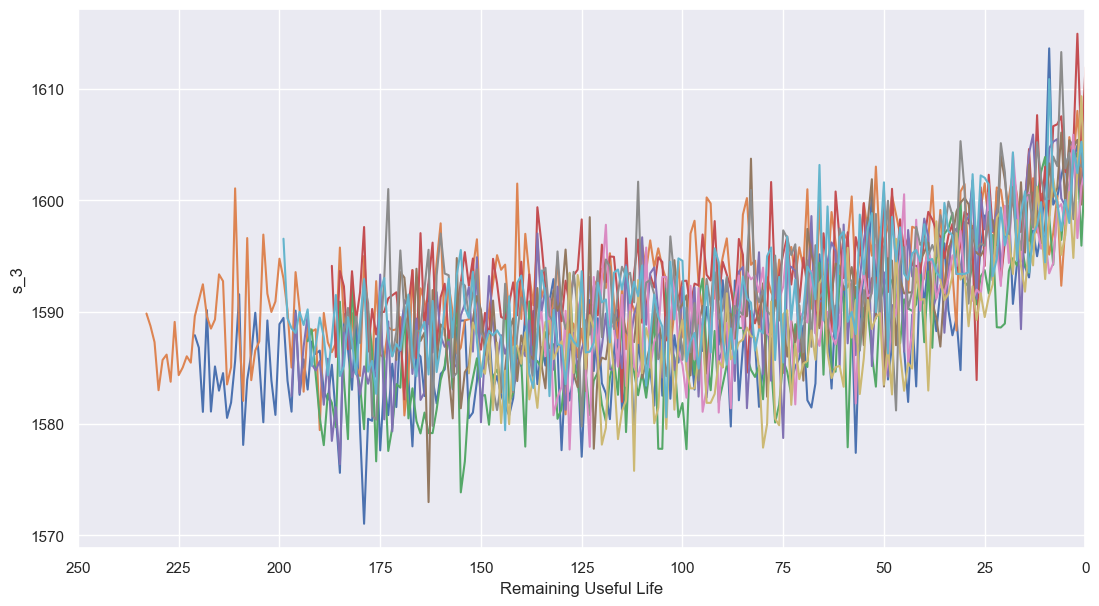

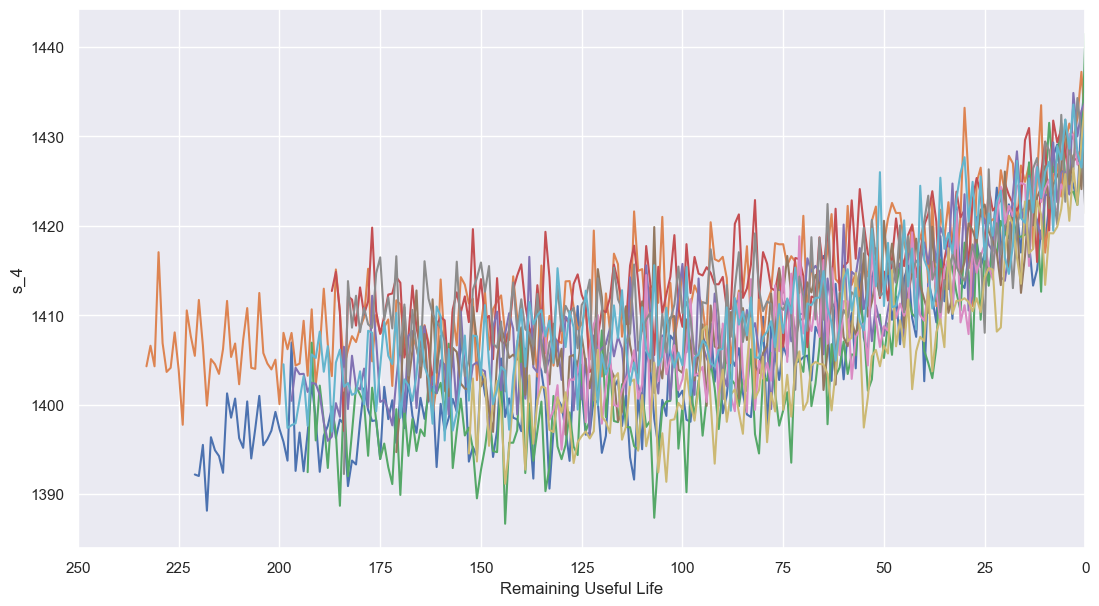

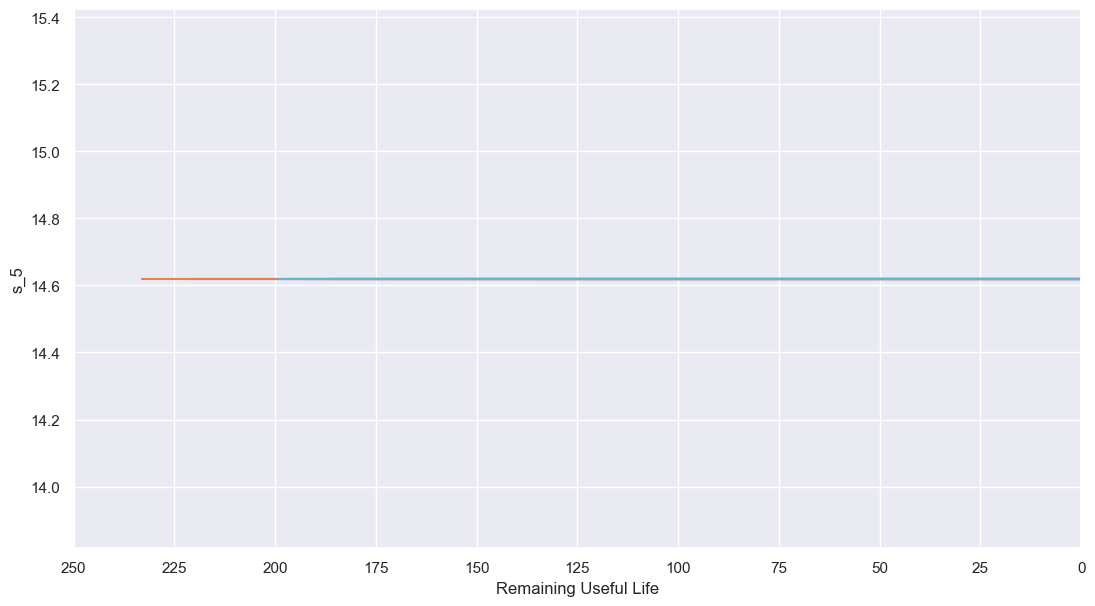

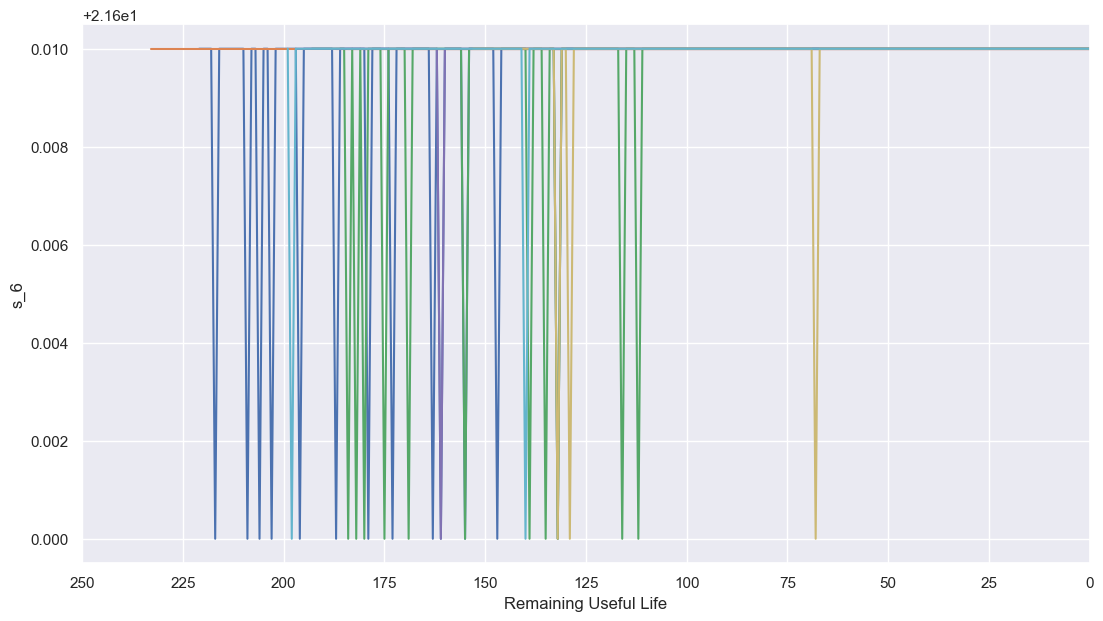

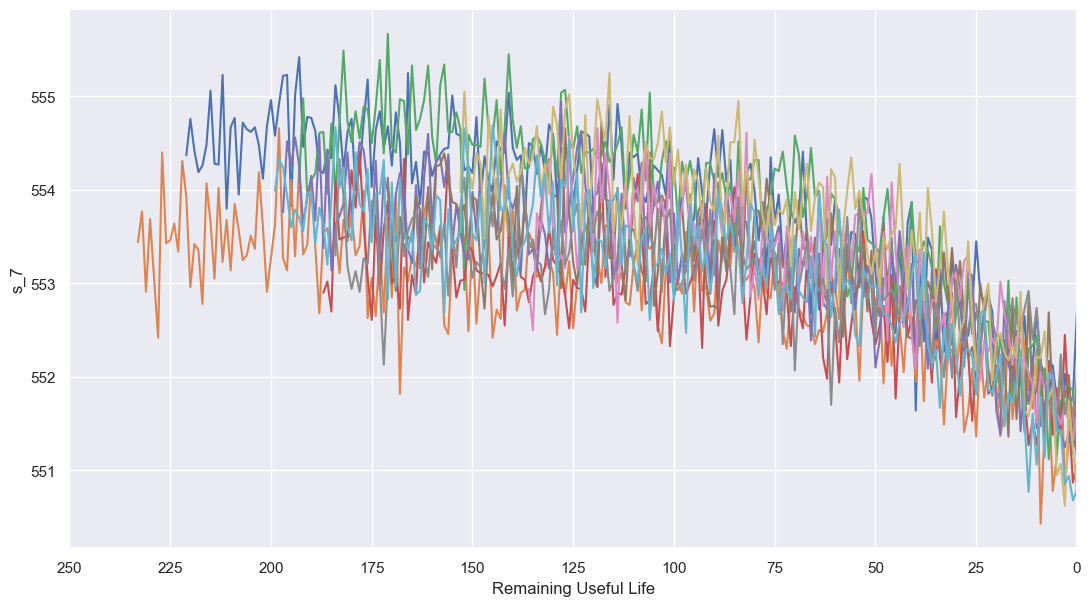

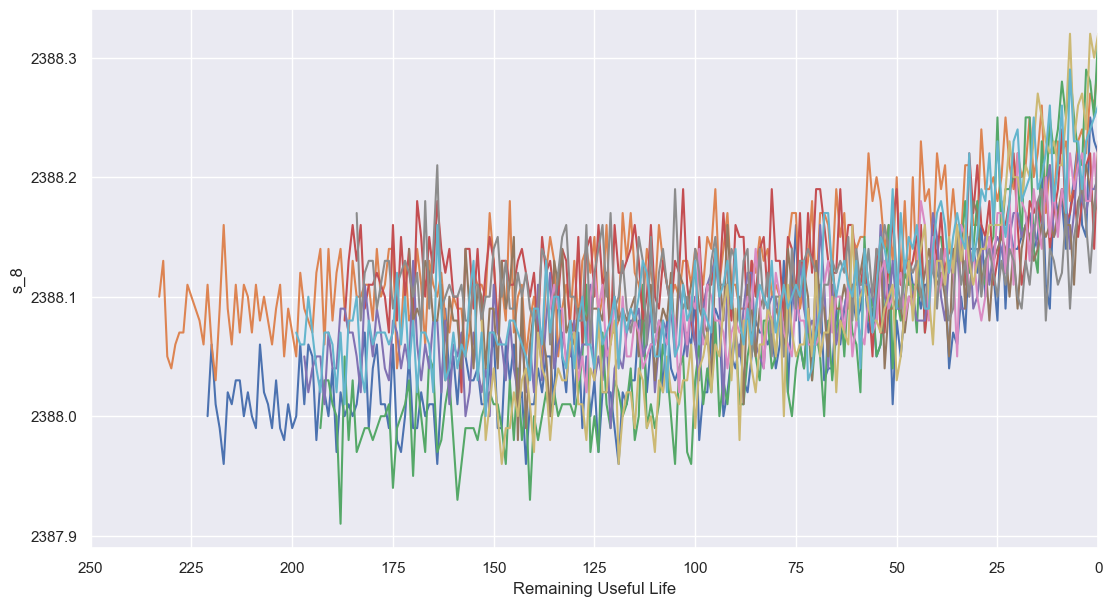

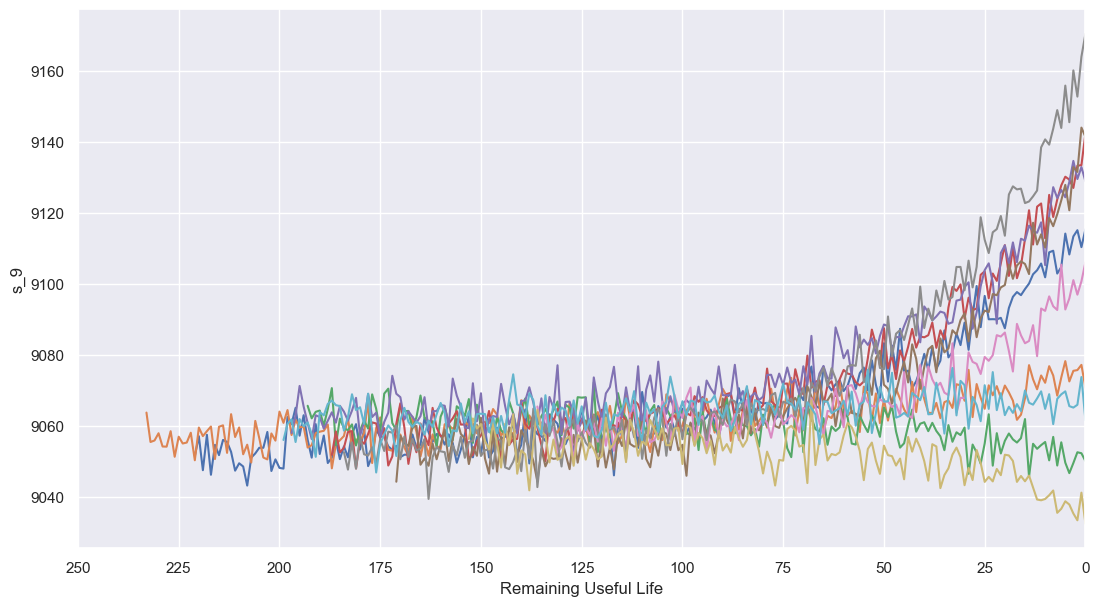

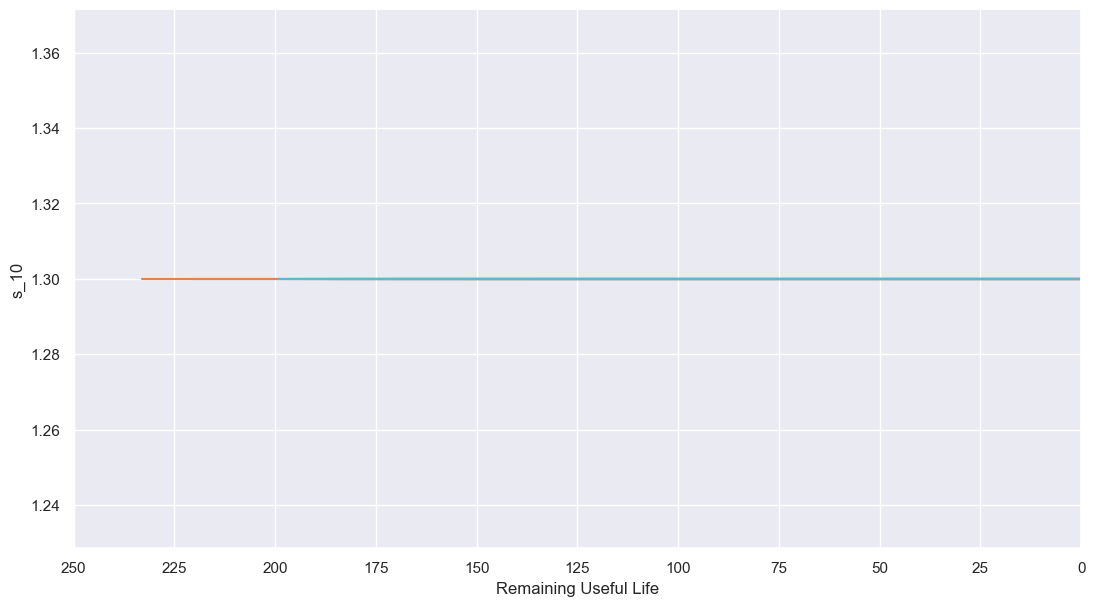

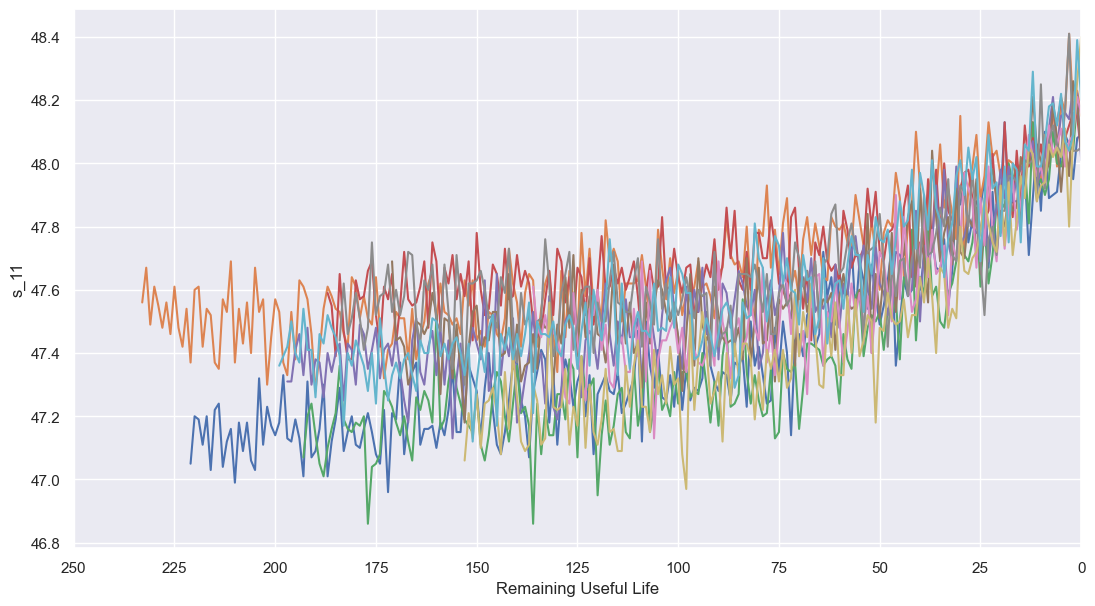

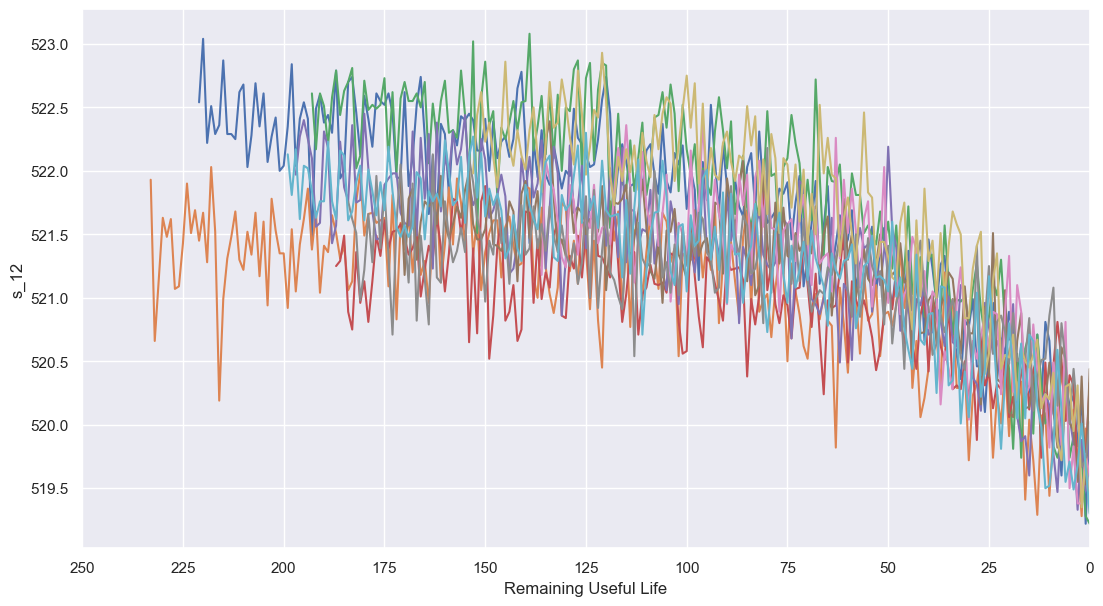

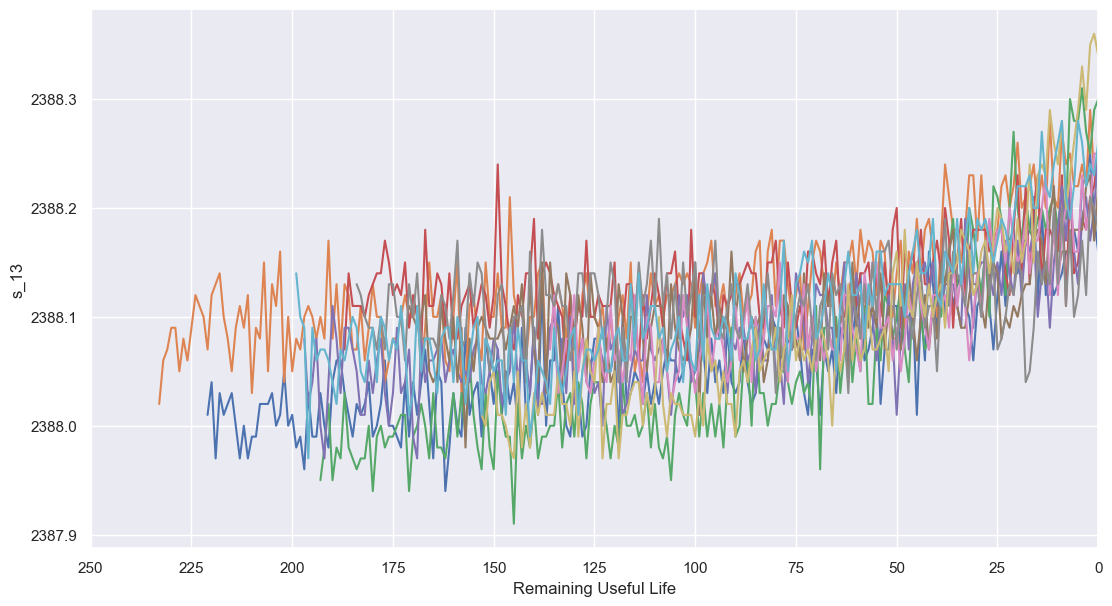

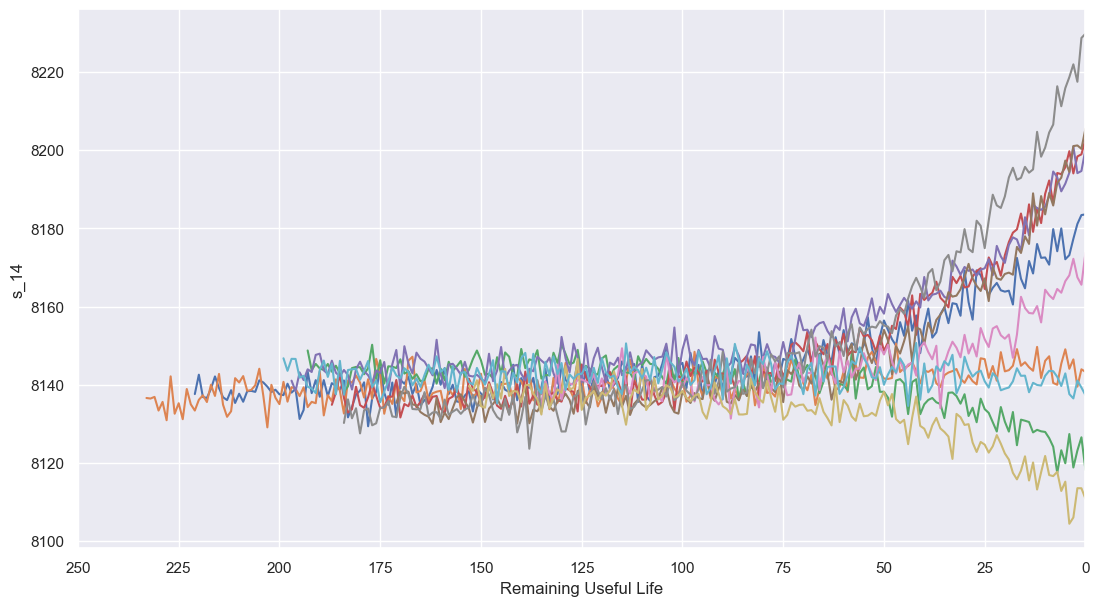

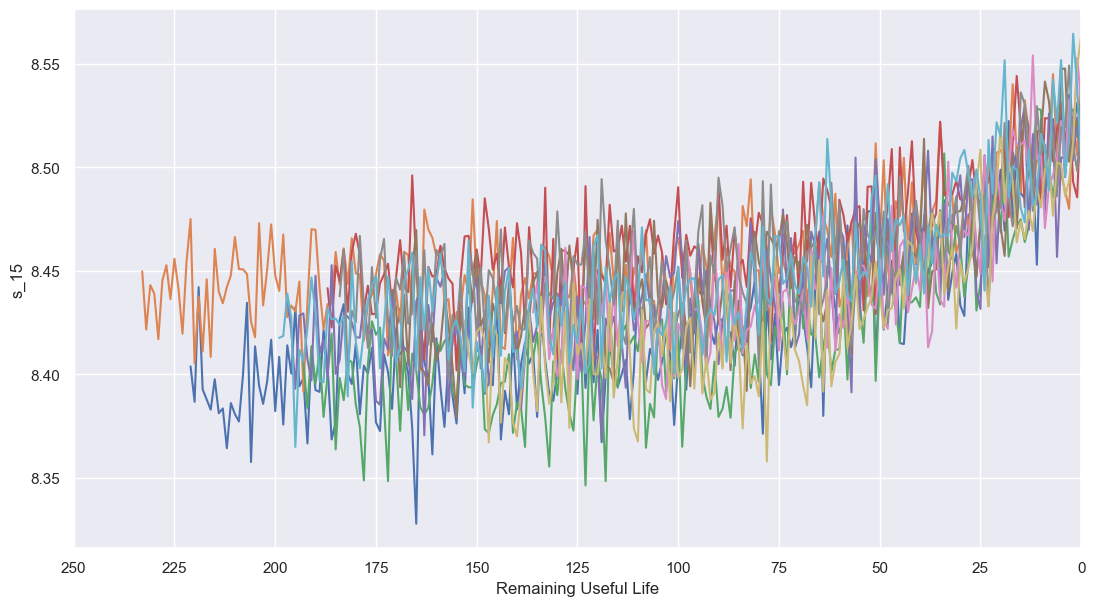

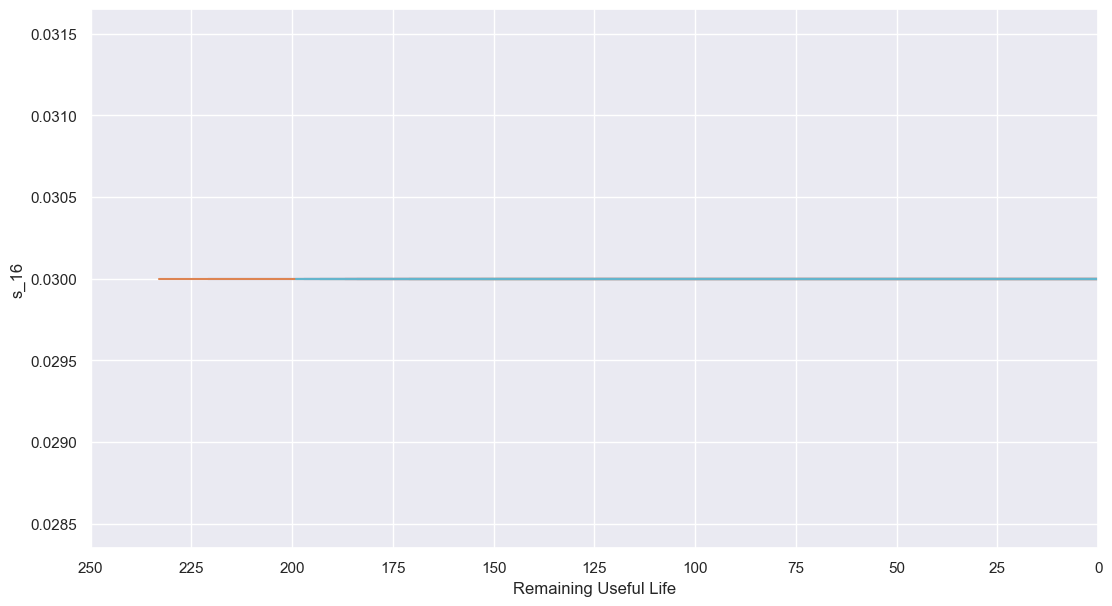

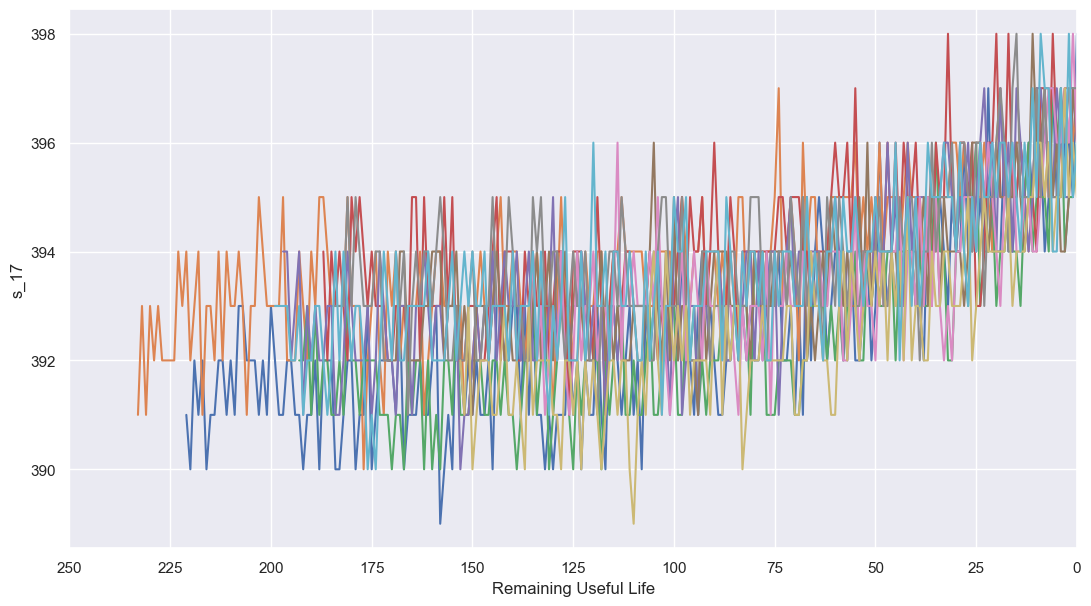

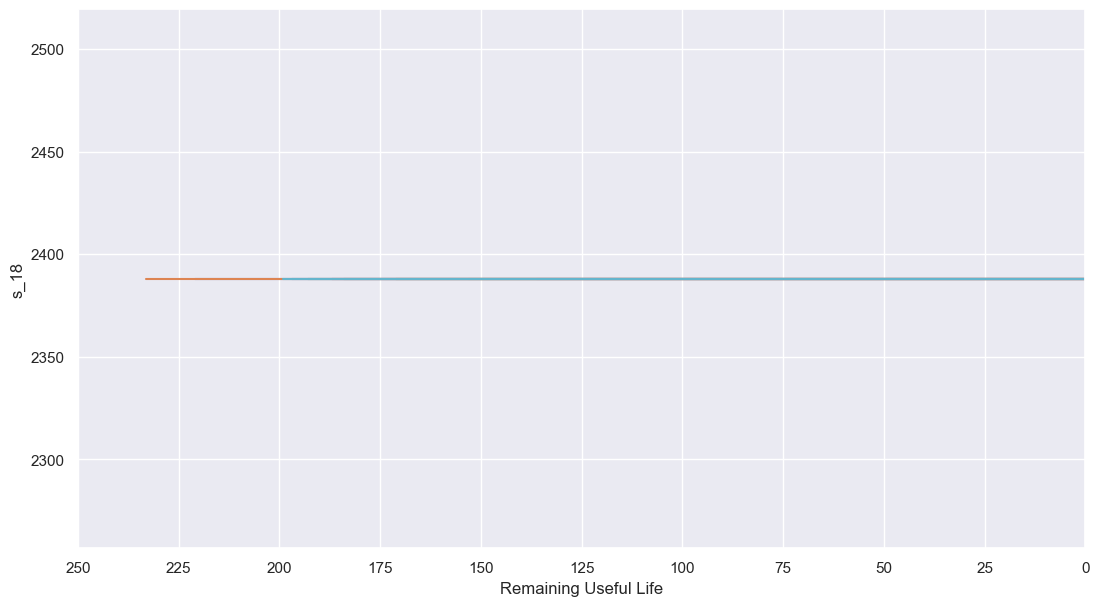

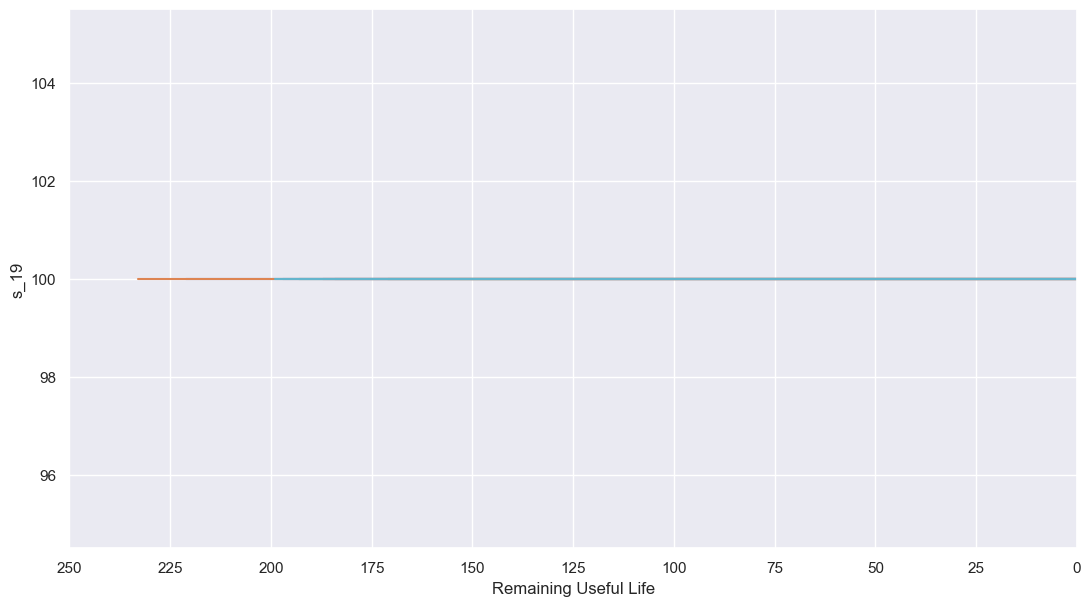

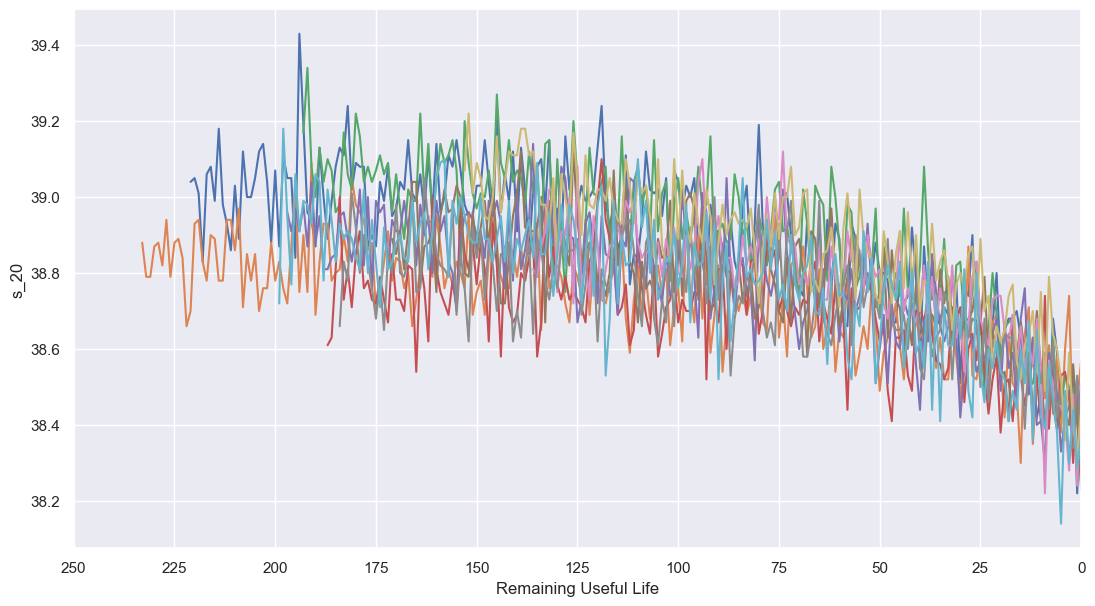

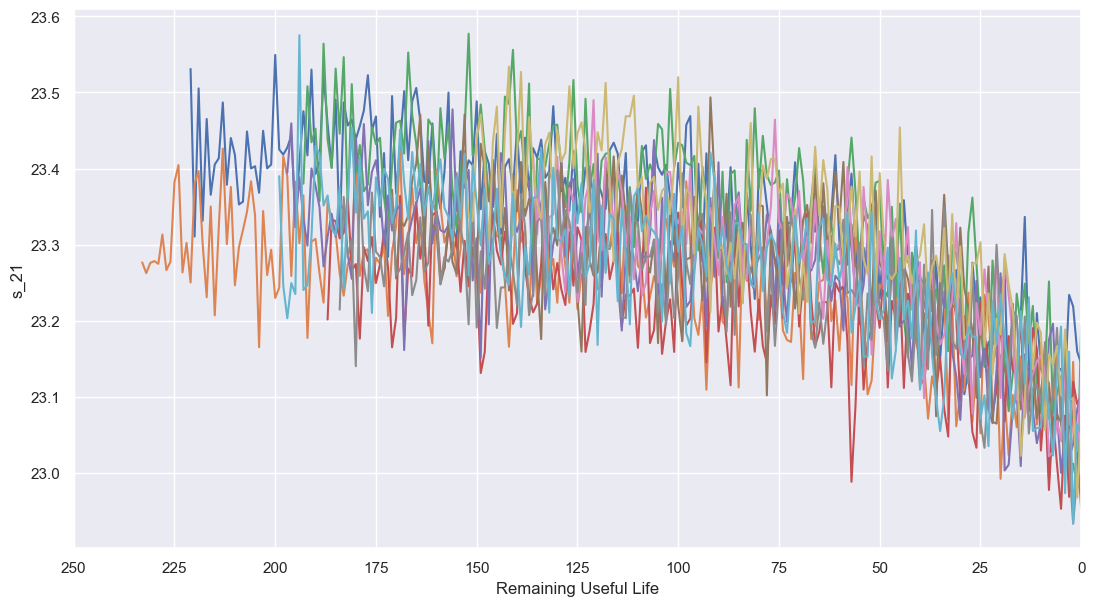

In [ ]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,7))
    for i in train_1['unit_nr'].unique():
        if (i % 10 == 0):
            plt.plot('RUL', sensor_name, data=train_1[train_1['unit_nr'] == i])
    plt.xlim(250, 0) # reverse the x_axis
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

# plotting sensor
for sensor_name in sensor_names:
    plot_sensor(sensor_name)

In [ ]:
# Group 1 : Sensors 1, 5, 10, 16, 18, and 19 showed no fluctuations
# Group 2 : Sensor 2,3, 4, 8, 11, 13, 15, and 17 shows a rising trend
# Group 3 : Sensor 7,12, 20, and 21 shows a declining trend
# Group 4 : Sensor 9 and 14 show similar patterns as the engine draws to failure.
# Group 5 : Sensor 6 readings oscillation but doesn't shows any signs as the engine runs to failure.
# Based on the Exploratory Data Analysis, sensor 1, 5, 6, 10, 16, 18 and 19 holds no useful information and can be dropped
# Varyansta bir eşik değeri olarak 0.05 belirlenmiştir.

In [ ]:
#LABELING DATA: NORMAL, WARNING, ALARM, FAILURE
#KFÖ Aralığı    Etiket
#0- 50            Acil
#50 - 125         Kısa
#125 - 200        Orta
#200 - …          Uzun

In [ ]:
#Splitting Data #

In [ ]:
#METRICS OF REGRESSION MODELS: R^2, ADJUSTED R^2, RMSE, MSE, MAE

def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [ ]:
def binary_evaluate (y_true, y_hat, label='test'):
    accuracy = accuracy_score(y_true, y_hat)
    precision = precision_score(y_true, y_hat)
    recall = recall_score(y_true, y_hat)
    print('{} set Accuracy:{}, Precision:{}, Recall:{}'.format(accuracy, precision, recall))

In [ ]:
X_test = test_1.groupby('unit_nr').last()#.reset_index().drop(drop_labels, axis=1)
X_test.head()                                                        #.last(): Compute the last non-null entry of each columnn


time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
unit_nr                                                                 
1                 31    -0.0006     0.0004      100.0  518.67  642.58   
2                 49     0.0018    -0.0001      100.0  518.67  642.55   
3                126    -0.0016     0.0004      100.0  518.67  642.88   
4                106     0.0012     0.0004      100.0  518.67  642.78   
5                 98    -0.0013    -0.0004      100.0  518.67  642.27   

             s_3      s_4    s_5    s_6  ...    s_12     s_13     s_14  \
unit_nr                                  ...                             
1        1581.22  1398.91  14.62  21.61  ...  521.79  2388.06  8130.11   
2        1586.59  1410.83  14.62  21.61  ...  521.74  2388.09  8126.90   
3        1589.75  1418.89  14.62  21.61  ...  520.83  2388.14  8131.46   
4        1594.53  1406.88  14.62  21.61  ...  521.88  2388.11  8133.64   
5        1589.94  1419.36  14.62  21.61  ...  521.00  2388.15  8125.74   

           s_15  s_16  s_17  s_18   s_19   s_20     s_21  
unit_nr                                                   
1        8.4024  0.03   393  2388  100.0  38.81  23.3552  
2        8.4505  0.03   391  2388  100.0  38.81  23.2618  
3        8.4119  0.03   395  2388  100.0  38.93  23.2740  
4        8.4634  0.03   395  2388  100.0  38.58  23.2581  
5        8.4362  0.03   394  2388  100.0  38.75  23.4117  

[5 rows x 25 columns]

In [ ]:
standrd = StandardScaler()
standrd.fit(X_test, y_test)

StandardScaler()

In [ ]:
# drop unwanted columns and split target variable from training set
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_labels = index_names+setting_names+drop_sensors

X_train = train_1.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL') #only the RUL column


# Since the true RUL values for the test set are only provided for the last time cycle of each enginge,
# the test set is subsetted to represent the same
X_test = test_1.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

y_train.head()

0    191
1    190
2    189
3    188
4    187
Name: RUL, dtype: int64

In [ ]:
print(X_train.columns) # check remaining columns

Index(['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13',
       's_14', 's_15', 's_17', 's_20', 's_21'],
      dtype='object')


In [ ]:
#LINEAR REGRESSION AS BASEMODEL#

In [ ]:
# create and fit model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# predict and evaluate
y_hat_train = model_1.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = model_1.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:44.66819159545405, R2:0.5794486527796807
test set RMSE:31.952633027727533, R2:0.4087736807662695


In [ ]:
# binary_evaluate (y_train, y_hat_train, label='train')

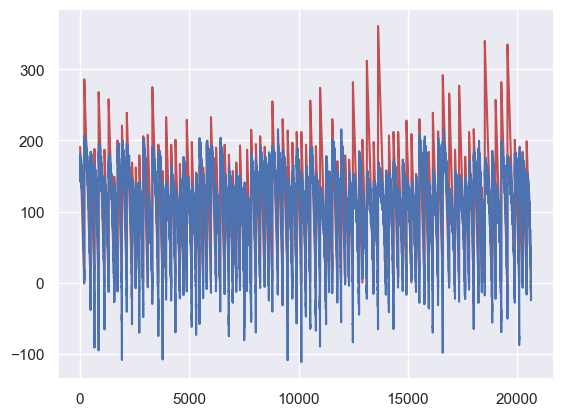

In [ ]:
plt.plot(y_train,color='r')
plt.plot(y_hat_train,color='b')
plt.show()

In [ ]:
#Re-examining RUL#

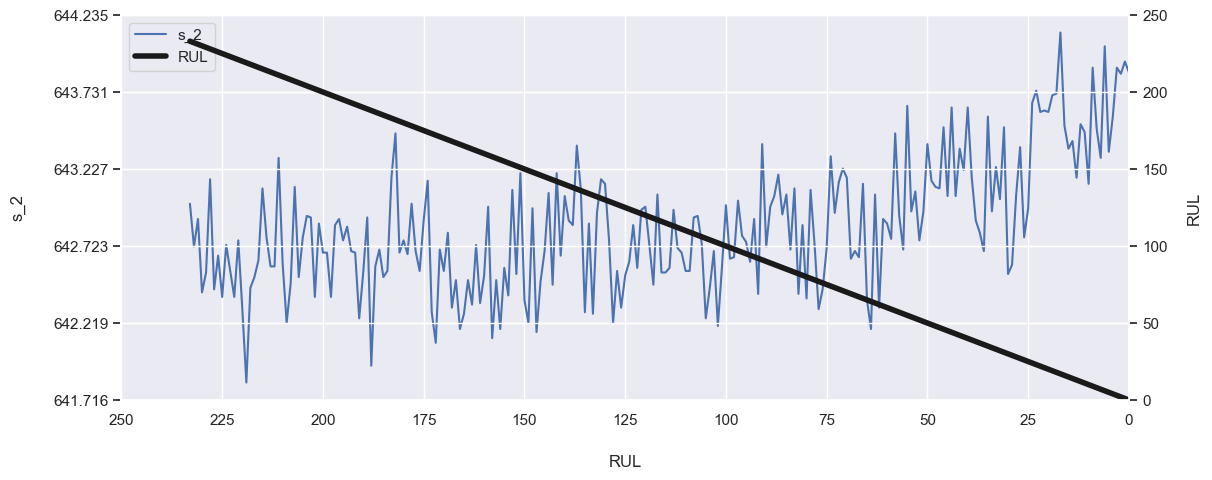

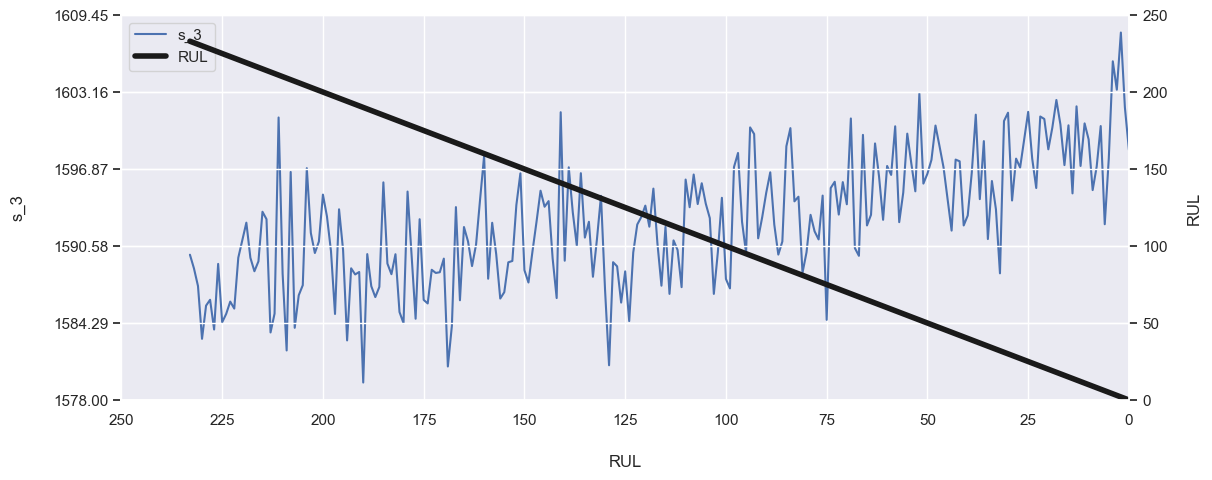

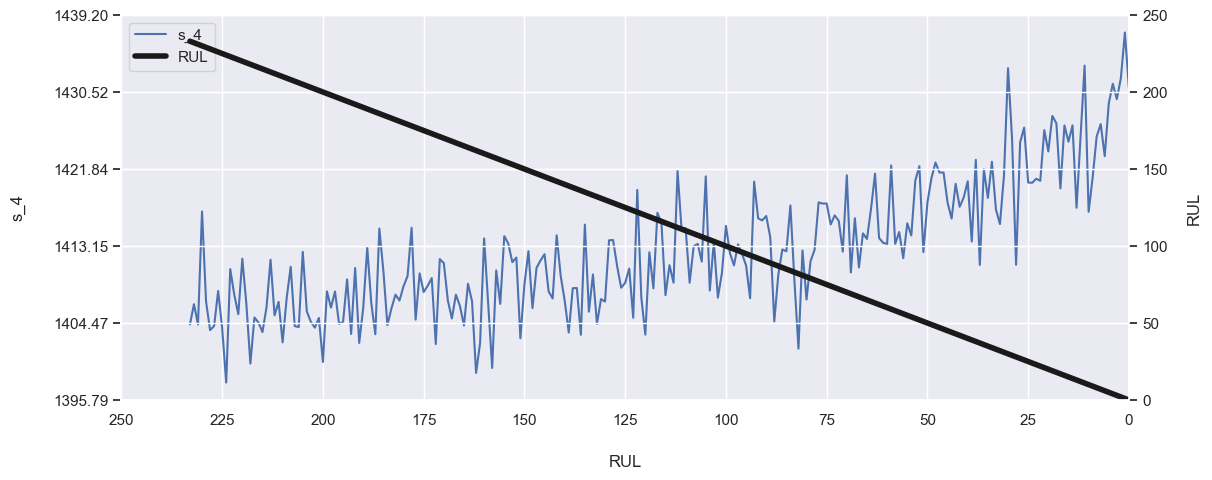

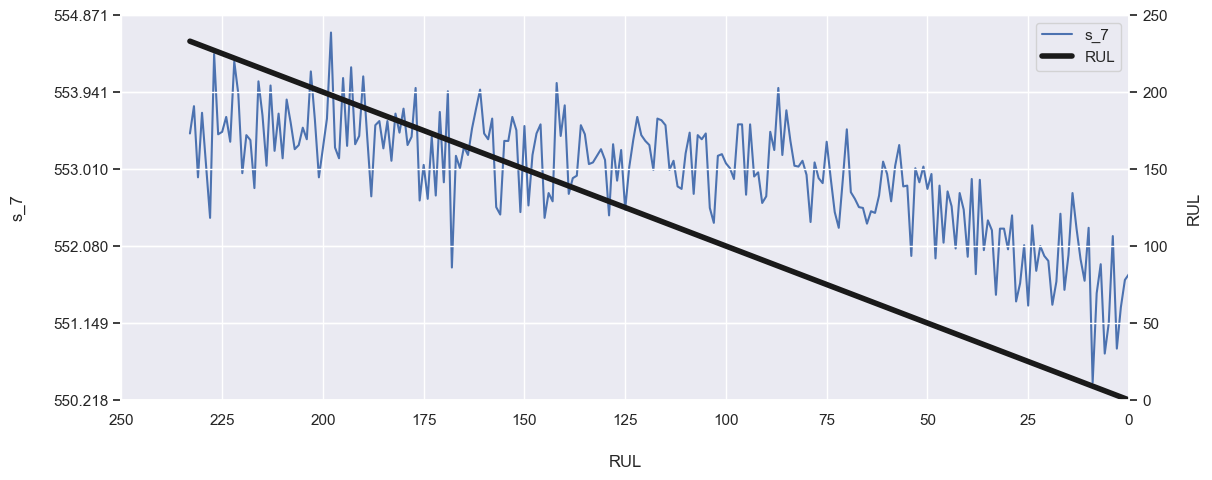

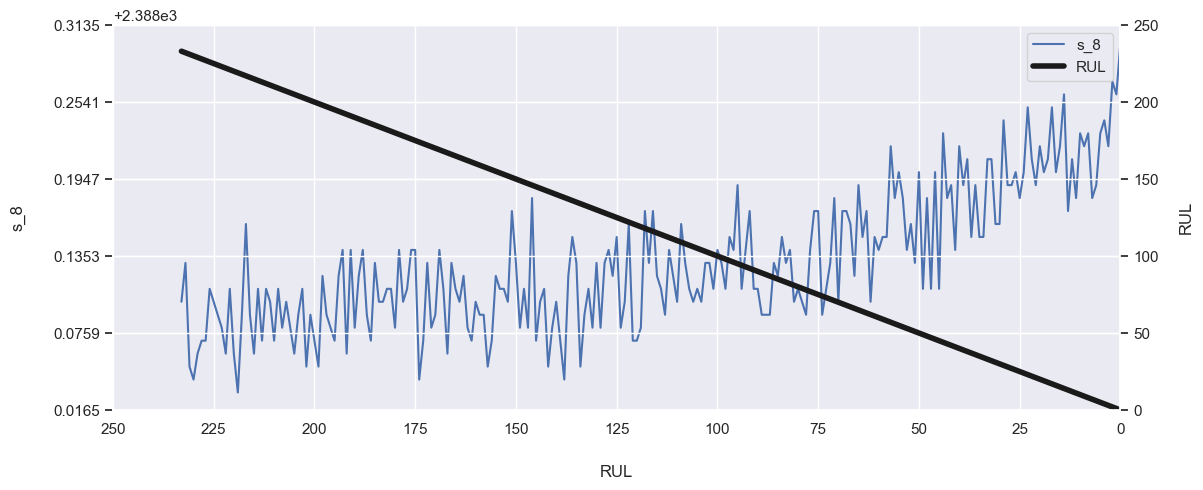

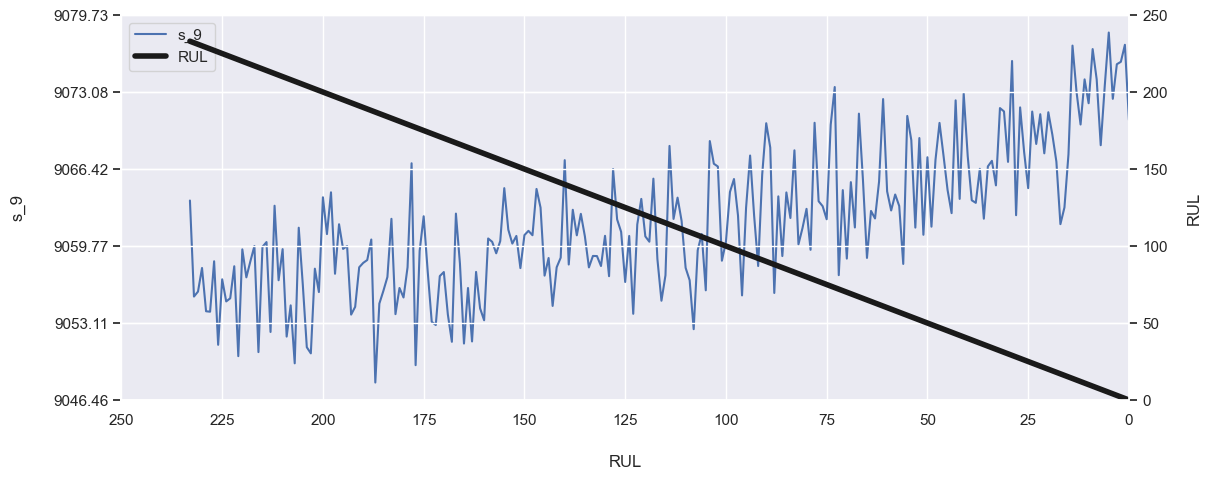

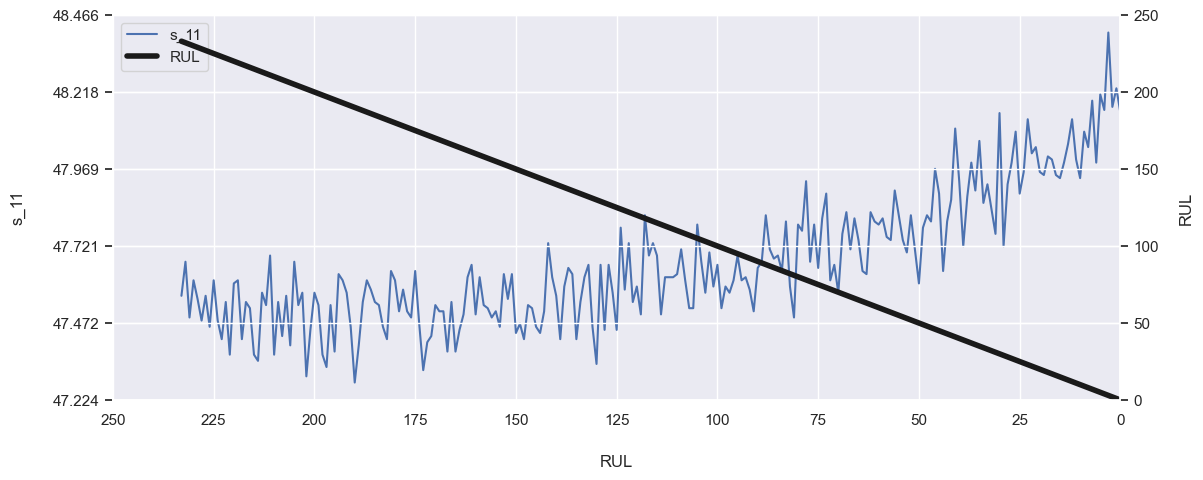

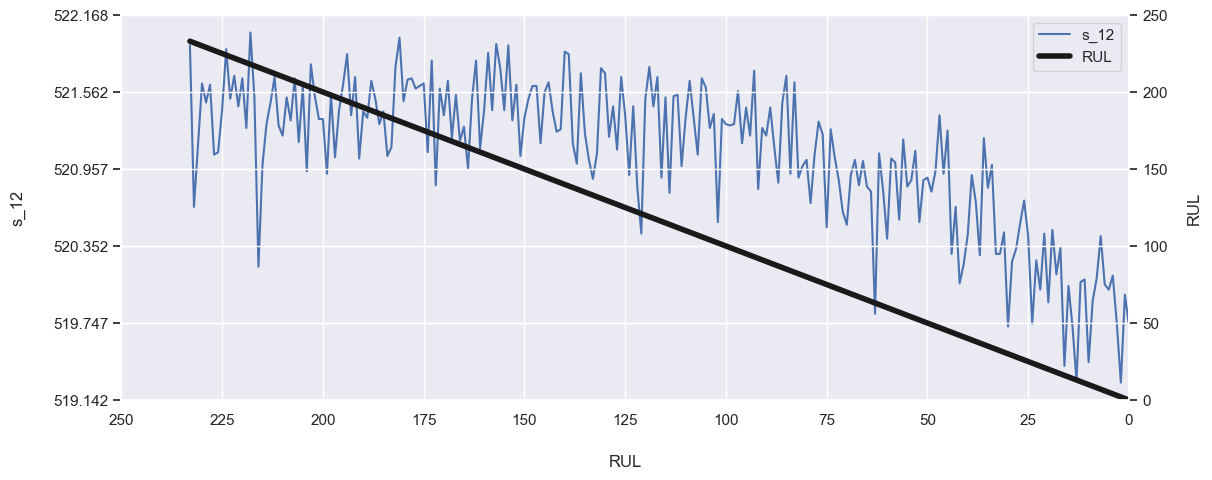

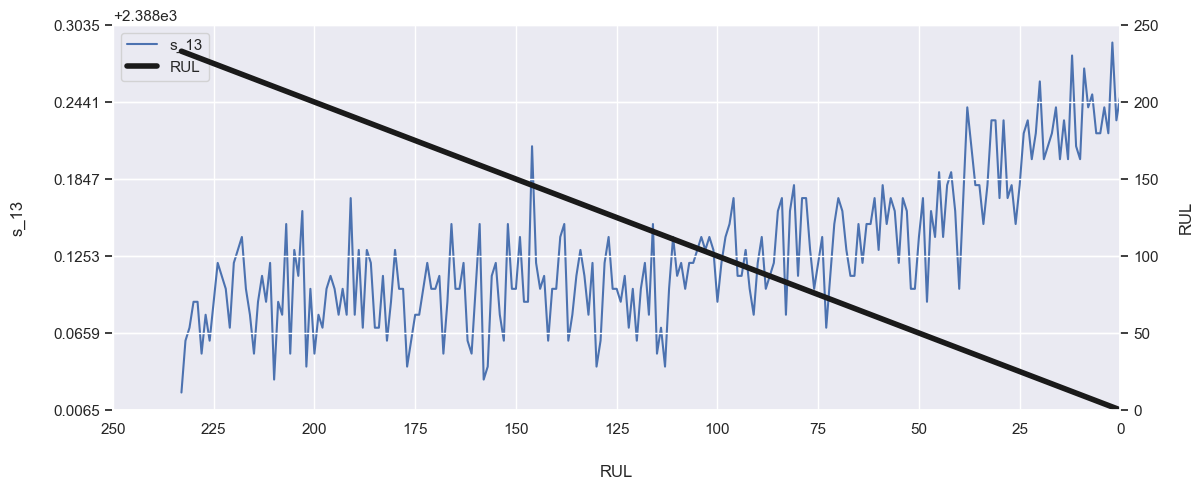

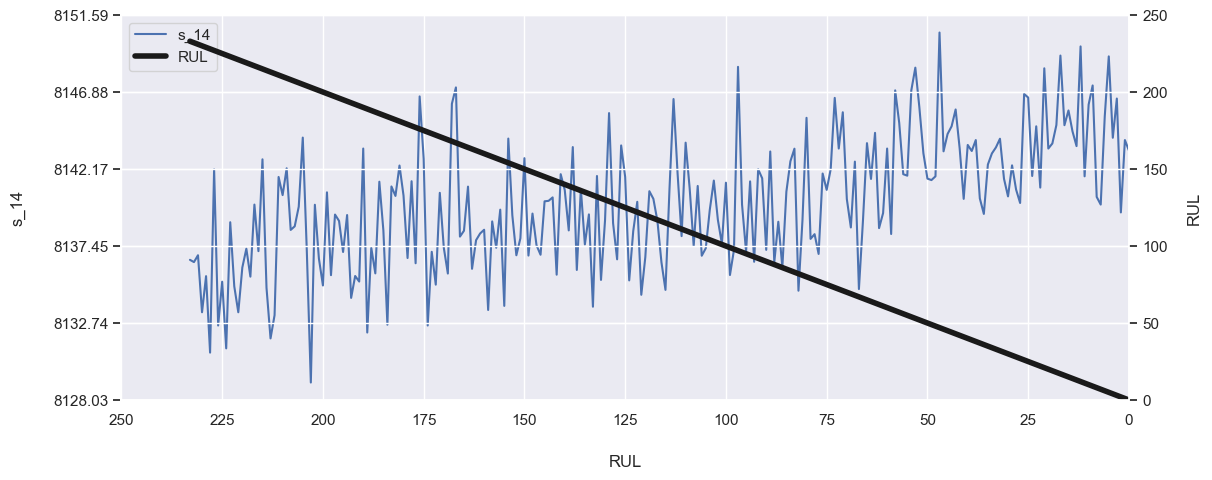

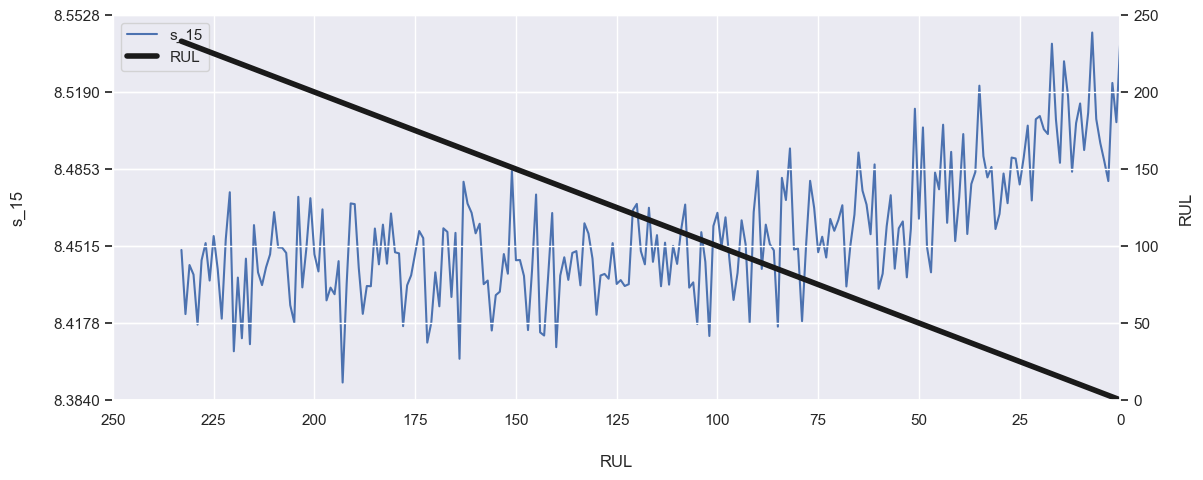

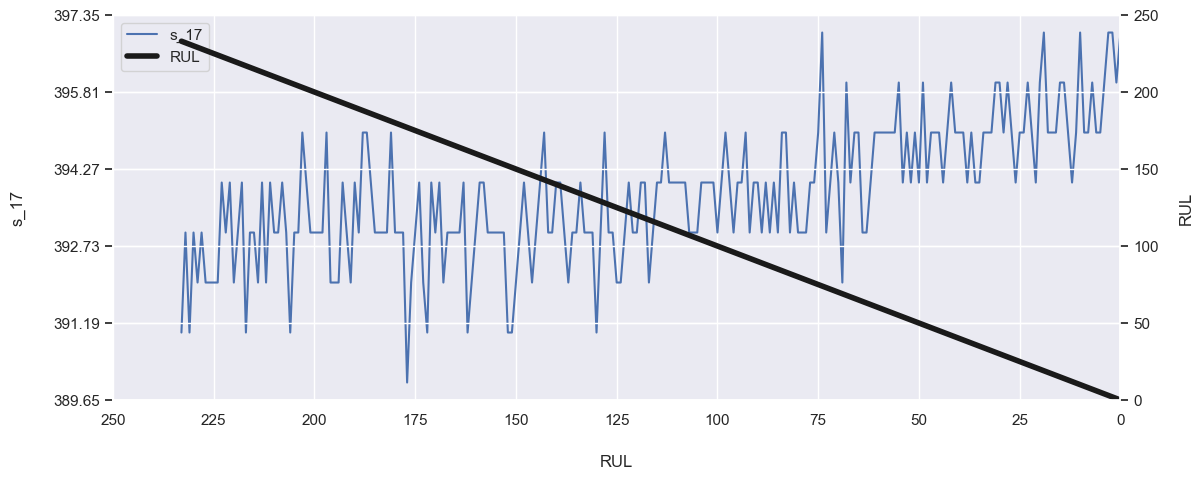

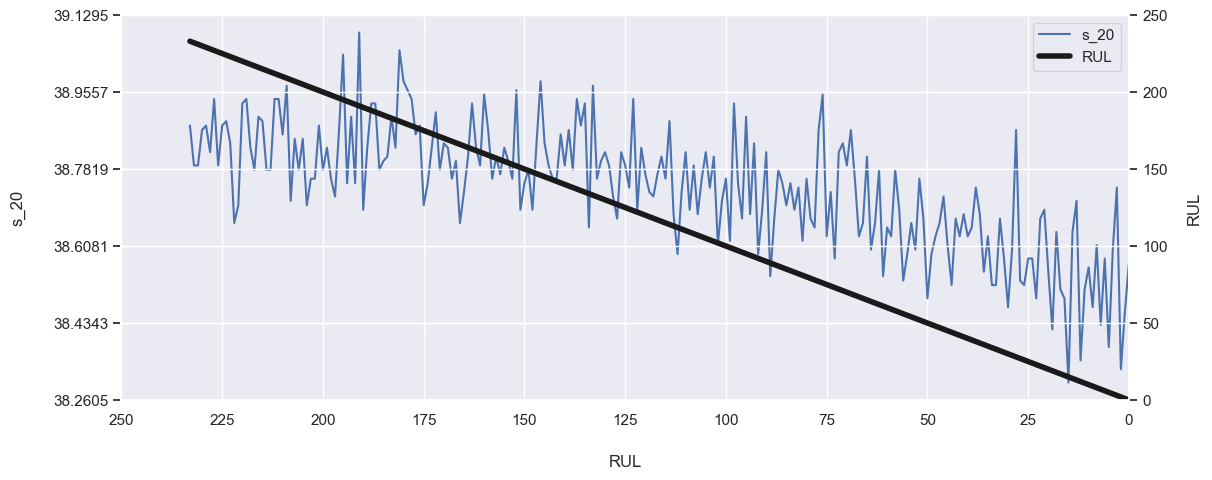

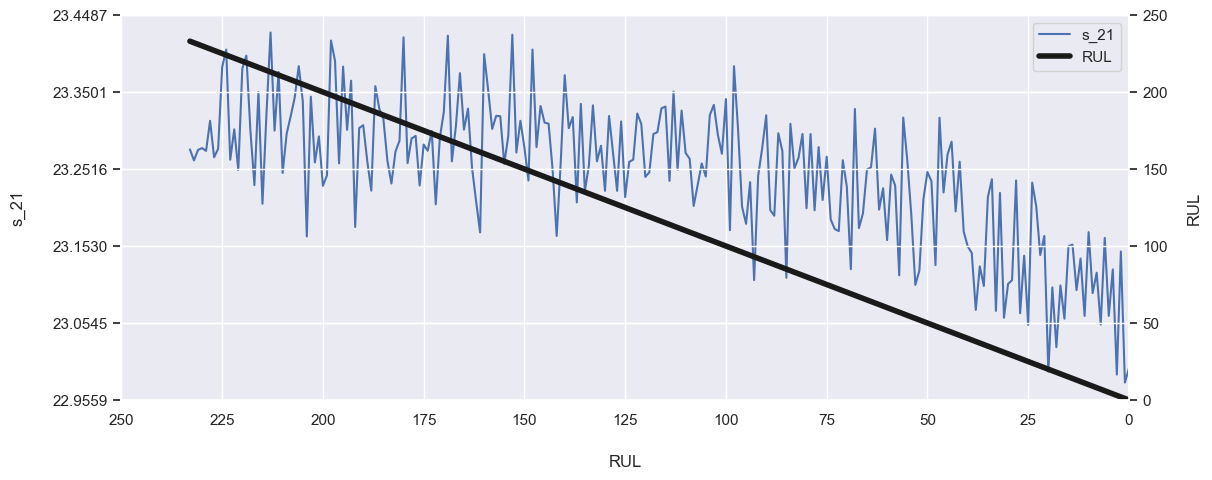

In [ ]:
 for i in range (0,14):
    fig, ax1 = plt.subplots(1,1, figsize=(13,5))

    signal = ax1.plot('RUL', X_train.columns[i] , 'b', data=train_1.loc[train_1['unit_nr']==20])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    ax1.set_ylabel(X_train.columns[i], labelpad=20)
    ax1.set_xlabel('RUL', labelpad=20)

    ax2 = ax1.twinx()
    rul_line = ax2.plot('RUL', 'RUL', 'k', linewidth=4, data=train_1.loc[train_1['unit_nr']==20])
    ax2.set_ylabel('RUL', labelpad=14)

# code to have equal spacing of y ticks for both axes, so the gridlines allign
# from https://stackoverflow.com/questions/20243683/matplotlib-align-twinx-tick-marks?rq=1
    ax2.set_ylim(0, 250)  # set limits of axis you want to display neatly
    ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))  # choose integer to neatly divide your axis, in our case 6
    ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))  # apply same spacing to other axis

# code to have a unified legend
# from https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
    lines = signal+rul_line
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc=0)

plt.show()




In [ ]:
# define clipped RUL
y_train_clipped = y_train.clip(upper=125)  #Any values in y_train that are greater
                                           #than 125 will be replaced with 125

# create and fit model
model_1 = LinearRegression()
model_1.fit(X_train, y_train_clipped)

# predict and evaluate
y_hat_train = model_1.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = model_1.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:21.491018701515124, R2:0.7340432868050519
test set RMSE:21.900213406887712, R2:0.7222608196546952


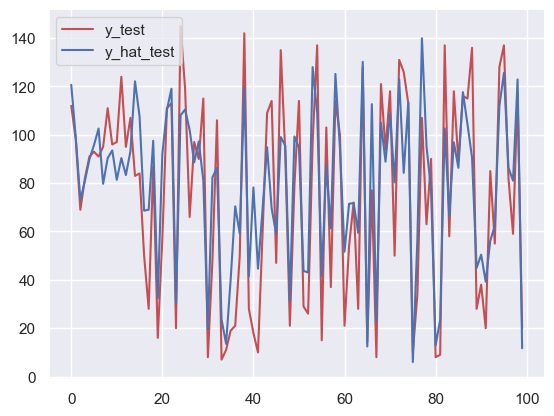

In [ ]:
plt.plot(y_test, color='r', label='y_test')
plt.plot(y_hat_test, color='b', label='y_hat_test')
plt.legend()
plt.show()

In [ ]:
#SUPPORT VECTOR REGRESSION#

In [ ]:
# create and fit model
svr = SVR(kernel='linear')
svr.fit(X_train, y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test_svr = svr.predict(X_test)
evaluate(y_test, y_hat_test_svr)

train set RMSE:31.162854665387698, R2:0.44079451641915235
test set RMSE:31.762230542307382, R2:0.4157988020504362


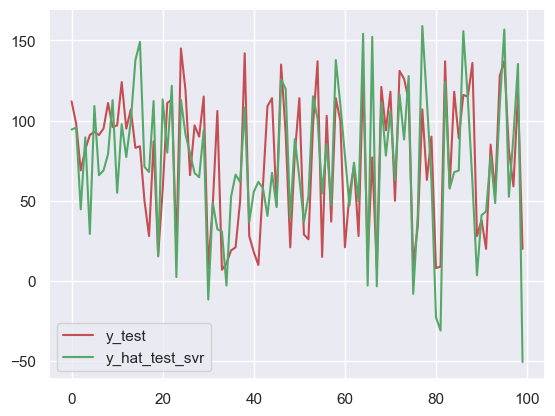

In [ ]:
plt.plot(y_test, color='r', label='y_test')
plt.plot(y_hat_test_svr, color='g', label='y_hat_test_svr')
plt.legend()
plt.show()

In [ ]:
#plt.scatter(y_test, y_hat_test)
#plt.show()

In [ ]:
# Scaling

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM polynomial regression
svr = SVR(kernel='poly', degree=2, coef0=10)
svr.fit(X_train_scaled, y_train_clipped)

# predict and evaluate

y_hat_train = svr.predict(X_train_scaled)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_scaled)
evaluate(y_train_clipped, y_hat_train)

train set RMSE:19.55794241289872, R2:0.7797361231077964
test set RMSE:19.55794241289872, R2:0.7797361231077964


In [ ]:
#plt.scatter(y_test, y_hat_test)
#plt.show(y_train_clipped, y_hat_train)

In [ ]:
#Random Forest Regression#

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rnd_forest = RandomForestRegressor(n_estimators=200, max_features='sqrt', random_state=42)
rnd_forest.fit(X_train, y_train_clipped)

# predict and evaluate
y_hat_train = rnd_forest1.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = rnd_forest.predict(X_test)
evaluate(y_test, y_hat_test)

In [ ]:
#plt.scatter(y_test, y_hat_test)
#plt.show()

In [ ]:
#STANDARDIZATION

In [ ]:
scaler_2 = StandardScaler()
X_train_standscaled = scaler_2.fit_transform(X_train)
X_test_standscaled = scaler_2.transform(X_test)


y_hat_train = svr.predict(X_train_standscaled)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_standscaled)
evaluate()

In [ ]:
scaler_3 = Normalizer()
X_train_normalized = scaler_3.fit_transform(X_train)
X_test_normalized = scaler_3.transform(X_test)
evaluate()

In [ ]:
#PCA

In [ ]:
pca=PCA(n_components = 13)
pca.fit(X_train_scaled)

In [ ]:
X_train_pca  = pca.transform(X_train_scaled)
X_train_pca